In [1]:
from IPython import display
!pip3 install -U lazypredict
display.clear_output()

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyClassifier

%matplotlib inline
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
submission = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")

In [4]:
X = train.drop("label", axis = 1) / 255
Y = train[["label"]]

X_tn, X_te, Y_tn, Y_te = train_test_split(X, Y, stratify = Y, random_state = 5, test_size = .4)

In [5]:
clf = LazyClassifier(predictions=True)

models, predictions = clf.fit(X_tn , X_te , Y_tn , Y_te)

100%|██████████| 29/29 [41:07<00:00, 85.09s/it]  


In [6]:
models[:15]

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.97,0.97,None,0.97,55.30
XGBClassifier,0.97,0.97,None,0.97,277.66
ExtraTreesClassifier,0.96,0.96,None,0.96,16.50
RandomForestClassifier,0.96,0.96,None,0.96,16.95
SVC,0.95,0.95,None,0.95,177.04
KNeighborsClassifier,0.93,0.93,None,0.93,15.32
BaggingClassifier,0.92,0.91,None,0.92,44.83
SGDClassifier,0.90,0.90,None,0.91,127.96
LogisticRegression,0.90,0.90,None,0.90,8.19


In [106]:
#fig, ax = plt.subplots(figsize=(3, 3))
#for n in range(0, X.shape[0], 1000):
#    Image = X[n,:].reshape(28,28)
#    ax.imshow(Image, cmap='gray')
#    ax.set_title('label display: ' + str(int(Y[n])), fontsize=16)
#    ax.axis('off')
#    plt.draw()
#    display.clear_output(wait=True)
#    display.display(fig)
#    plt.pause(0.5)

In [107]:
X_tn = X_tn / 255
X_te = X_te / 255

check the answer label    6
Name: 25543, dtype: int64


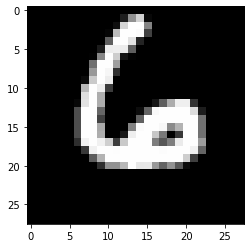

In [108]:
plt.imshow(X_tn.to_numpy()[10].reshape(28,28), cmap='gray')
print("check the answer", Y_tn.iloc[10])

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
classifier = KNeighborsClassifier(n_neighbors = 3)

In [11]:
classifier.fit(X_tn, Y_tn)

KNeighborsClassifier(n_neighbors=3)

In [12]:
classifier.score(X_te, Y_te)

0.9623214285714285

In [13]:
y_pred = classifier.predict(test)

In [14]:
y_pred.min()

0

In [15]:
submission["Label"] = y_pred
submission.to_csv("submission.csv", index=False)
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,8
3,4,0
4,5,3
